In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df["Heart Disease"] = (df["Heart Disease"] == 'Presence').astype(int)

In [ ]:
df = df.drop(labels=['FBS over 120'], axis=1)

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,2,121,1,0.2,1,1,3,0


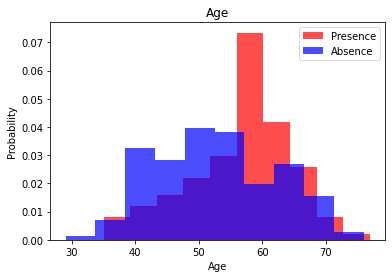

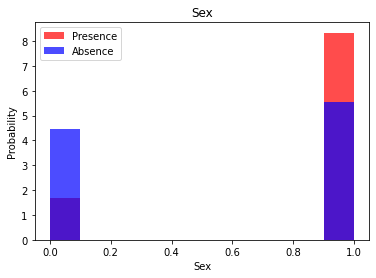

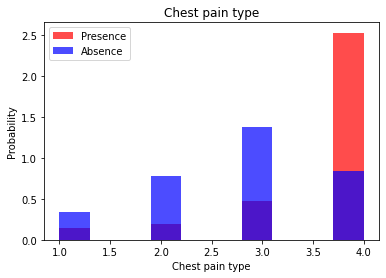

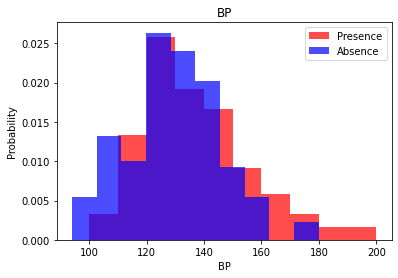

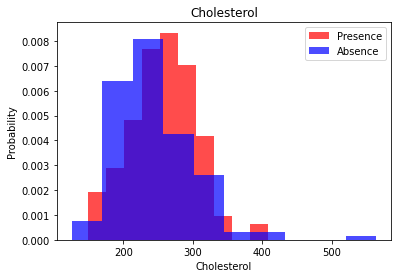

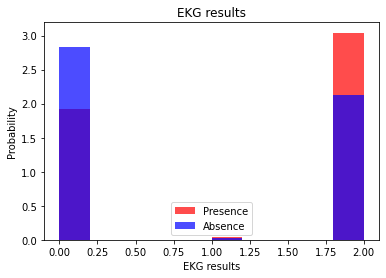

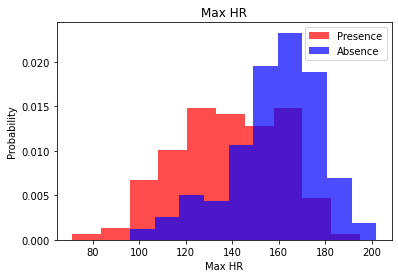

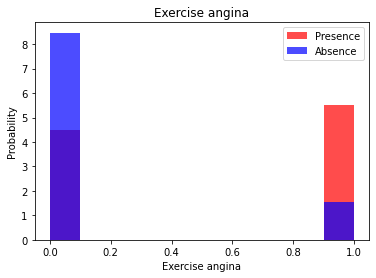

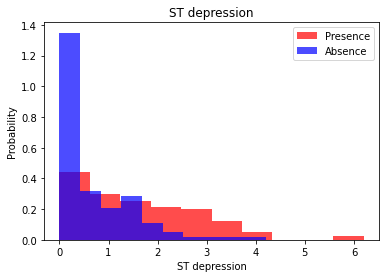

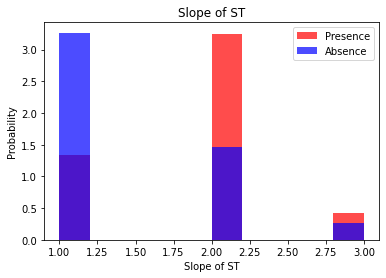

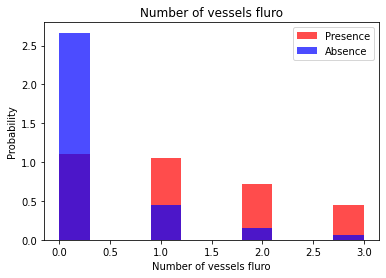

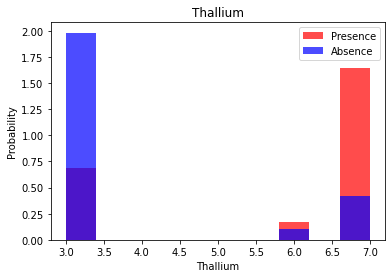

In [ ]:
for label in df.columns[:-1]:
  plt.hist(df[df["Heart Disease"]==1][label], color='red', label='Presence', alpha=0.7, density=True)
  plt.hist(df[df["Heart Disease"]==0][label], color='blue', label='Absence', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1,random_state=3), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
print(len(train[train['Heart Disease'] == 0]))

100


In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))


200
100
100


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [ ]:
lg_model = LogisticRegression(solver = 'saga' ) 
lg_model = lg_model.fit(X_train, y_train)


In [ ]:
y1_pred =lg_model.predict(X_valid)
print(classification_report(y_valid, y1_pred))
print('Accuracy of logistic regression classifier on validation set: {:.2f}\n\n'.format(lg_model.score(X_valid, y_valid)))



y1_pred = lg_model.predict(X_test)
print(classification_report(y_test, y1_pred))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lg_model.score(X_test, y_test)))




              precision    recall  f1-score   support

           0       0.73      0.92      0.81        26
           1       0.90      0.68      0.78        28

    accuracy                           0.80        54
   macro avg       0.82      0.80      0.79        54
weighted avg       0.82      0.80      0.79        54

Accuracy of logistic regression classifier on validation set: 0.80


              precision    recall  f1-score   support

           0       0.77      0.96      0.85        24
           1       0.96      0.77      0.85        30

    accuracy                           0.85        54
   macro avg       0.86      0.86      0.85        54
weighted avg       0.87      0.85      0.85        54

Accuracy of logistic regression classifier on test set: 0.85


In [ ]:
print('Train rows:', train.shape[0])
print('Validation:' , valid.shape[0])
print('Test rows:', test.shape[0])

Train rows: 200
Validation: 54
Test rows: 54


In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix1= confusion_matrix(y_test, y1_pred)
print(cf_matrix1)

[[23  1]
 [ 7 23]]


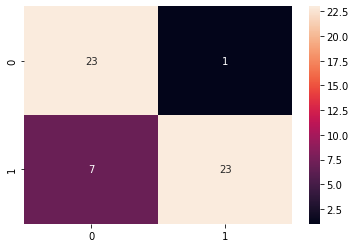

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix1, annot=True)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

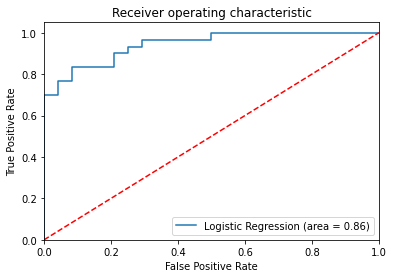

In [ ]:
logit_roc_auc = roc_auc_score(y_test, lg_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

-------------------------------------------------------

                      **svm**

-------------------------------------------------------

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='linear', probability=True)
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y2_pred =svm_model.predict(X_valid)
print(classification_report(y_valid, y2_pred))
print('Accuracy of SVM classifier on validation set: {:.2f}\n\n'.format(svm_model.score(X_valid, y_valid)))


y2_pred = svm_model.predict(X_test)
print(classification_report(y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        26
           1       0.91      0.71      0.80        28

    accuracy                           0.81        54
   macro avg       0.83      0.82      0.81        54
weighted avg       0.83      0.81      0.81        54

Accuracy of SVM classifier on validation set: 0.81


              precision    recall  f1-score   support

           0       0.73      0.92      0.81        24
           1       0.92      0.73      0.81        30

    accuracy                           0.81        54
   macro avg       0.82      0.82      0.81        54
weighted avg       0.84      0.81      0.81        54



In [ ]:
cf_matrix2= confusion_matrix(y_test, y2_pred)
print(cf_matrix2)

[[22  2]
 [ 8 22]]


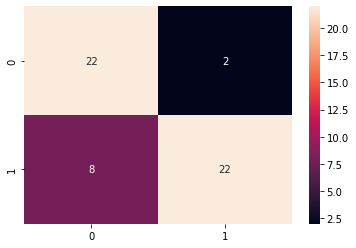

In [ ]:
sns.heatmap(cf_matrix2, annot=True)

In [ ]:
'''
# to plot soc carve you will need this code or their code under belw 
from sklearn.metrics import plot_roc_curve

plot_roc_curve(svm_model, X_test, y_test)
'''

'\n# to plot soc carve you will need this code or their code under belw \nfrom sklearn.metrics import plot_roc_curve\n\nplot_roc_curve(svm_model, X_test, y_test)\n'

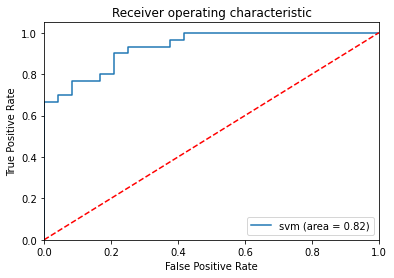

In [ ]:
svm_roc_auc1 = roc_auc_score(y_test, svm_model.predict(X_test))
fpr1, tpr1, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr1, tpr1, label='svm (area = %0.2f)' % svm_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()


NameError: ignored

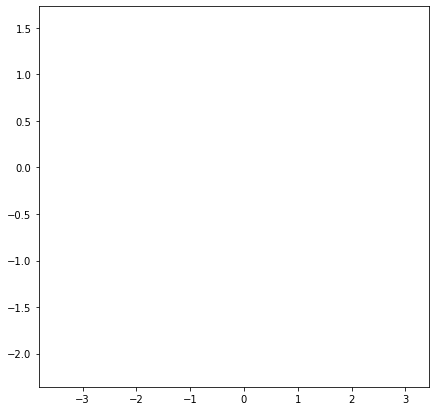